#Big Data Analytics and Applications Hands-On (1/23)

Name: Abhinav Kochar\
Student ID: 16358093

#Dataset for Classification

## Step 1: Import Libraries

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Step 2: Load and Prepare the Iris Dataset

In [9]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
'target']
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=columns)
# Map target classes to numerical values
df['target'] = df['target'].astype('category').cat.codes
# Split data into features and labels
X = df.iloc[:, :-1].values
y = df['target'].values
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#Define the Neural Network and Train

## Step 3: Define the Neural Network

In [10]:
# Define the NeuralNetwork class
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 3)  # Output layer for 3 classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


##Step 4: Train the Model

In [11]:
# Train the model
epochs = 20
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}")

Epoch 1/20, Loss: 1.0862
Epoch 2/20, Loss: 1.0629
Epoch 3/20, Loss: 1.0274
Epoch 4/20, Loss: 0.9922
Epoch 5/20, Loss: 0.9440
Epoch 6/20, Loss: 0.8733
Epoch 7/20, Loss: 0.7793
Epoch 8/20, Loss: 0.6584
Epoch 9/20, Loss: 0.5340
Epoch 10/20, Loss: 0.4455
Epoch 11/20, Loss: 0.3806
Epoch 12/20, Loss: 0.3256
Epoch 13/20, Loss: 0.2860
Epoch 14/20, Loss: 0.2506
Epoch 15/20, Loss: 0.2148
Epoch 16/20, Loss: 0.1943
Epoch 17/20, Loss: 0.1725
Epoch 18/20, Loss: 0.1500
Epoch 19/20, Loss: 0.1336
Epoch 20/20, Loss: 0.1112


# Validate the Model

## Step 5: Validate the Model

In [12]:
# Evaluate the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


#Visualise Training and Data

## Step 6: Visualize Training Loss and Data Distribution

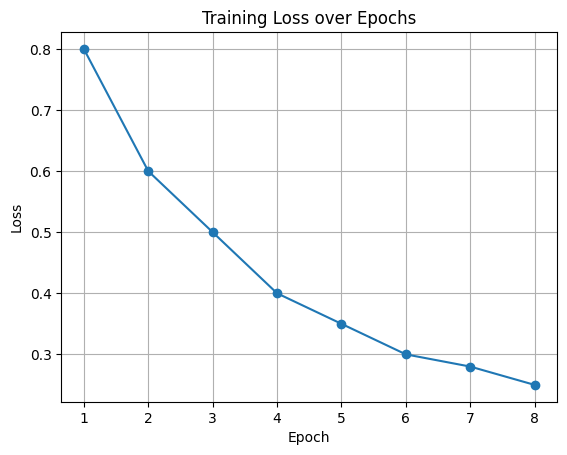

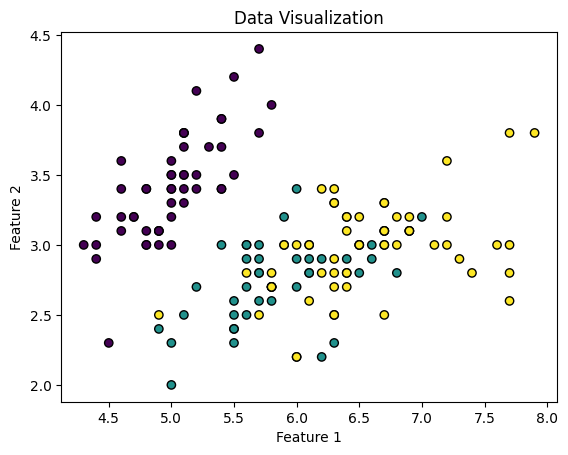

In [13]:
# Plotting training loss (example values, replace with real loss values if collected)
losses = [0.8, 0.6, 0.5, 0.4, 0.35, 0.3, 0.28, 0.25]
plt.plot(range(1, len(losses) + 1), losses, marker='o')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

# Visualize data distribution (Replace X and y with your dataset variables)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization')
plt.show()

#Student Task

Load the Data

In [24]:
# prompt: import the Wine Dataset(UCI)

import pandas as pd

# URL of the Wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

# Column names for the dataset
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols',
           'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
           'OD280/OD315 of diluted wines', 'Proline']

# Load the dataset into a pandas DataFrame
wine_df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows of the DataFrame
print(wine_df.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

In [25]:
# prompt: in the above dataset, please repeat all the functions that was applies on the dataset before

# Map target classes to numerical values
wine_df['Class'] = wine_df['Class'].astype('category').cat.codes

# Split data into features and labels
X_wine = wine_df.iloc[:, 1:].values  # Features (excluding the 'Class' column)
y_wine = wine_df['Class'].values  # Labels

# Train-test split
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Standardize the data
scaler_wine = StandardScaler()
X_train_wine = scaler_wine.fit_transform(X_train_wine)
X_test_wine = scaler_wine.transform(X_test_wine)

# Convert data to PyTorch tensors
X_train_tensor_wine = torch.tensor(X_train_wine, dtype=torch.float32)
y_train_tensor_wine = torch.tensor(y_train_wine, dtype=torch.long)
X_test_tensor_wine = torch.tensor(X_test_wine, dtype=torch.float32)
y_test_tensor_wine = torch.tensor(y_test_wine, dtype=torch.long)

# Create DataLoader
train_dataset_wine = TensorDataset(X_train_tensor_wine, y_train_tensor_wine)
test_dataset_wine = TensorDataset(X_test_tensor_wine, y_test_tensor_wine)
train_loader_wine = DataLoader(train_dataset_wine, batch_size=16, shuffle=True)
test_loader_wine = DataLoader(test_dataset_wine, batch_size=16, shuffle=False)


# Define the Neural Network (modified for the wine dataset)
class WineNeuralNetwork(nn.Module):
    def __init__(self):
        super(WineNeuralNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train_wine.shape[1], 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 3)  # Output layer for 3 wine classes
        )

    def forward(self, x):
        return self.model(x)

# Initialize the model, loss function, and optimizer
model_wine = WineNeuralNetwork()
criterion_wine = nn.CrossEntropyLoss()
optimizer_wine = optim.Adam(model_wine.parameters(), lr=0.001)

# Train the model
epochs = 20
for epoch in range(epochs):
    model_wine.train()
    running_loss = 0.0
    for X_batch, y_batch in train_loader_wine:
        optimizer_wine.zero_grad()
        outputs = model_wine(X_batch)
        loss = criterion_wine(outputs, y_batch)
        loss.backward()
        optimizer_wine.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader_wine):.4f}")



Epoch 1/20, Loss: 1.0561
Epoch 2/20, Loss: 0.9531
Epoch 3/20, Loss: 0.8498
Epoch 4/20, Loss: 0.7270
Epoch 5/20, Loss: 0.5978
Epoch 6/20, Loss: 0.4673
Epoch 7/20, Loss: 0.3517
Epoch 8/20, Loss: 0.2586
Epoch 9/20, Loss: 0.1900
Epoch 10/20, Loss: 0.1452
Epoch 11/20, Loss: 0.1139
Epoch 12/20, Loss: 0.0913
Epoch 13/20, Loss: 0.0773
Epoch 14/20, Loss: 0.0638
Epoch 15/20, Loss: 0.0553
Epoch 16/20, Loss: 0.0478
Epoch 17/20, Loss: 0.0435
Epoch 18/20, Loss: 0.0368
Epoch 19/20, Loss: 0.0331
Epoch 20/20, Loss: 0.0298


In [26]:
# Evaluate the model
model_wine.eval()
correct = 0
total = 0

with torch.no_grad():
    for X_batch, y_batch in test_loader_wine:
        outputs = model_wine(X_batch)
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 1.0000


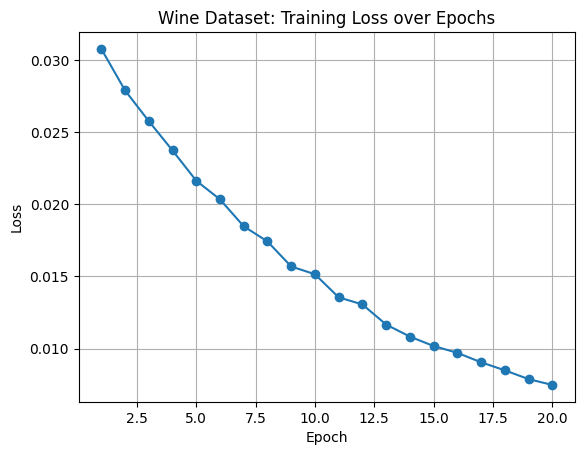

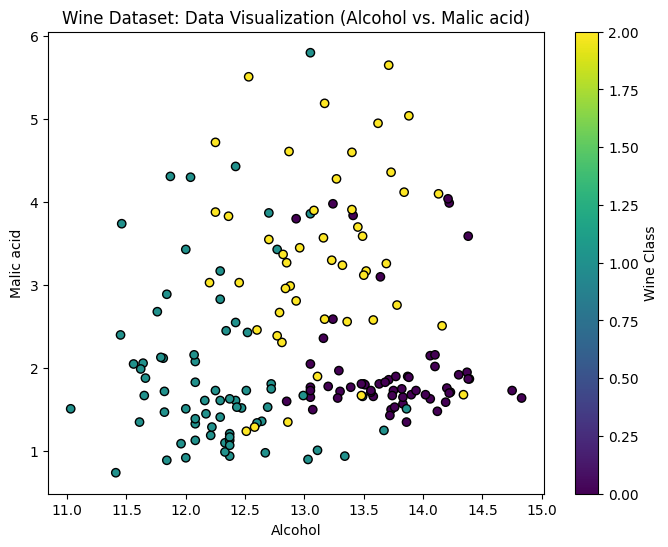

In [27]:


plt.plot(range(1, len(losses_wine) + 1), losses_wine, marker='o')
plt.title('Wine Dataset: Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()



# Data Distribution Visualization for Wine Dataset (Example - Using first two features)
plt.figure(figsize=(8, 6))
plt.scatter(X_wine[:, 0], X_wine[:, 1], c=y_wine, cmap='viridis', edgecolor='k')  # Adjust feature indices as needed
plt.xlabel('Alcohol') # Update based on feature index
plt.ylabel('Malic acid') # Update based on feature index
plt.title('Wine Dataset: Data Visualization (Alcohol vs. Malic acid)')
plt.colorbar(label='Wine Class')
plt.show()
